# 机器学习实验1
设直线方程 $\begin{aligened}y=h_\theta(x)=a+bx+\epsilon\end{aligened}$，其中$\begin{aligened}\epsilon\end{aligened}$是高斯噪声
请采100个输入样本，计算出相应的输出样本，利用线性回归模型拟合这些样本
利用最小二乘求解，并可视化算法的回归的结果

In [1]:
# 导库
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

In [2]:
# 初始化变量
x = np.random.rand(100) * 10                            # 生成100个随机样本的输入
noise = np.random.normal(0, 1, 100)                     # 高斯噪声，服从标准正态分布（均值为0，标准差为1，数量100）
a = 3                                                   # 参数 a = 3，我们的机器学习任课老师最终决定用(3, 4)这套参数
b = 4                                                   # 参数 b = 4，我们的机器学习任课老师最终决定用(3, 4)这套参数
y = a + np.dot(b, x) + noise                            # 解析函数————>用以产生真实的y

In [3]:
# 实现矩阵的增广
# (1, x1, x2, ..., xn).T × (w0, w1, w2, ..., wn) = w0 + w1x1 + w2x2 + ... + wnxn
one = np.ones(100)                                      # 全一向量，用于乘以常量参数
x_b = np.c_[one.T, x]                                   # 利用np.c_函数，横向拼接两个矩阵

In [4]:
# 求拟合函数的权重：最小二乘法
pinv = numpy.linalg.pinv(np.dot(x_b.T,x_b))             # 求伪逆
w = np.dot(np.dot(pinv, x_b.T), y)                      # 求权重

In [5]:
# 求拟合函数
y_predict = np.dot(w, x_b.T)                            # 预测值

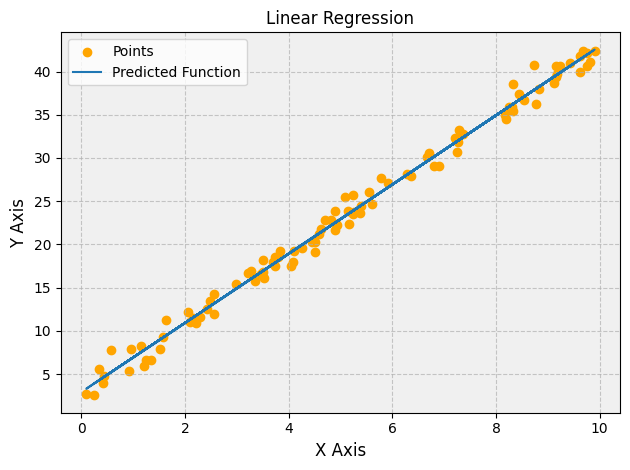

In [6]:
# 可视化
fig, ax = plt.subplots()                                # 建画布
ax.scatter(x, y, color='orange')                        # 绘制散点
ax.plot(x, y_predict)                                   # 绘制函数
ax.legend(['Points', 'Predicted Function'])             # 添加图例
ax.set_xlabel('X Axis', fontsize=12)                    # 横坐标标签
ax.set_ylabel('Y Axis', fontsize=12)                    # 纵坐标标签
ax.set_title('Linear Regression')                       # 设置图表标题
ax.tick_params(which='major', labelsize=10)             # 设置刻度标签大小
ax.grid(True, linestyle='--', alpha=0.7)                # 添加网格线
ax.set_facecolor('#f0f0f0')                             # 设置背景颜色
plt.tight_layout()                                      # 调节位置，美化图像
plt.show()                                              # 显示图像